In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

In [4]:
df = pd.read_csv("/home/mahir_uddin/Downloads/Uber dataset/Uber Cleaned Dataset.csv")
df.head()

,timestamp,date,hour,day_of_week,month,source,destination,ride_company,vehicle,visibility,...,distance,surge_multiplier,fare,humidity,wind_speed,weather_desc_short,weather_desc_long,weather_status,pressure,temperature_C
0,2018-11-26 03:40:46,2018-11-26,3,Monday,11,Boston University,Financial District,Lyft,Lux Black,1.685,...,4.46,1.75,62.5,0.92,0.51,Foggy,Rain in the morning and afternoon.,fog,1014.1,5.46
1,2018-11-26 03:40:46,2018-11-26,3,Monday,11,Boston University,Financial District,Lyft,Lux,1.685,...,4.46,1.75,47.5,0.92,0.51,Foggy,Rain in the morning and afternoon.,fog,1014.1,5.46
2,2018-11-26 03:40:46,2018-11-26,3,Monday,11,North Station,Fenway,Uber,WAV,1.685,...,3.05,1.00,10.5,0.92,0.51,Foggy,Rain in the morning and afternoon.,fog,1014.1,5.46
3,2018-11-26 03:40:46,2018-11-26,3,Monday,11,Boston University,Theatre District,Lyft,Lux Black XL,1.685,...,3.03,1.00,34.0,0.92,0.51,Foggy,Rain in the morning and afternoon.,fog,1014.1,5.46
4,2018-11-26 03:40:46,2018-11-26,3,Monday,11,Northeastern University,Beacon Hill,Lyft,Lyft,1.685,...,2.43,1.00,10.5,0.92,0.51,Foggy,Rain in the morning and afternoon.,fog,1014.1,5.46


In [5]:
df.columns

Index(['timestamp', 'date', 'hour', 'day_of_week', 'month', 'source',
       'destination', 'ride_company', 'vehicle', 'visibility', 'cloud_cover',
       'uv_index', 'distance', 'surge_multiplier', 'fare', 'humidity',
       'wind_speed', 'weather_desc_short', 'weather_desc_long',
       'weather_status', 'pressure', 'temperature_C'],
      dtype='object')

In [6]:
df["weather_status"].unique()

array(['fog', 'rain', 'cloudy', 'partly cloudy', 'clear'], dtype=object)

# **Test-1**

## 📌 **Hypothesis Statement**

We want to test whether the fare is significantly higher when the weather is rainy compared to when it is clear.

- **Null Hypothesis (H₀)**: There is no difference in the mean fare between rainy and clear weather conditions.
- **Alternative Hypothesis (H₁)**: The mean fare is higher when the weather is rainy than when it is clear.

This is a **one-tailed** t-test since we're specifically testing if fare is higher in rainy weather.

In [37]:
# Get fare data for 'rain' and 'clear' weather
fare_rain = df[df['weather_status'] == 'rain']['fare']
fare_clear = df[df['weather_status'] == 'clear']['fare']

In [38]:
# Check if sample sizes are reasonable
print("Sample size (Rain):", len(fare_rain))
print("Sample size (Clear):", len(fare_clear))

Sample size (Rain): 108903
Sample size (Clear): 78233


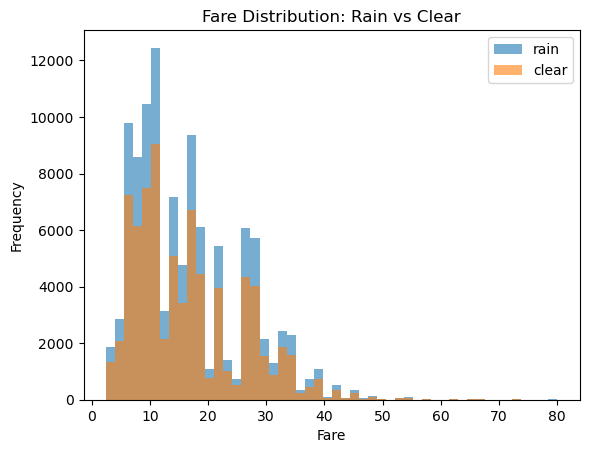

In [44]:
# Visualize distributions
plt.hist(fare_rain, bins=50, alpha=0.6, label='rain')
plt.hist(fare_clear, bins=50, alpha=0.6, label='clear')
plt.legend()
plt.title("Fare Distribution: Rain vs Clear")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()

In [46]:
fare_rain.mean(), fare_clear.mean()

(16.550657924942378, 16.475558268249973)

In [47]:
fare_rain.std(), fare_clear.std()

(9.31472089327568, 9.26386440907696)

The mean and standard deviation under two weather condition is very close. Fare in rainy weather is just slightly more than fare in clear weather. We will now do t-test to confidently determine if that slight increase is a pattern or not.

In [41]:
# Perform one-tailed t-test (equal_var=False = Welch's t-test)
t_stat, p_val_two_tailed = ttest_ind(fare_rain, fare_clear, equal_var=False)

print("T-statistic:", t_stat)
print("Two-tailed P-value:", p_val_two_tailed)

# Convert to one-tailed p-value (for rainy > clear)
p_val_one_tailed = p_val / 2 if t_stat > 0 else 1 - (p_val / 2)
print("One-tailed P-value:", p_val_one_tailed)


T-statistic: 1.725777675335563
Two-tailed P-value: 0.0843892447294878
One-tailed P-value: 0.0421946223647439


## ✅ **Hypothesis Test Result and Interpretation**

- **T-statistic:** 1.73  
- **One-tailed P-value:** 0.0422  
- **Significance level (α):** 0.01

We conducted a one-tailed independent t-test to evaluate whether the average fare is significantly higher during rainy weather compared to clear weather.

At a 1% significance level**, the p-value (0.0422) is greater than 0.01.  
Therefore, we fail to reject the null hypothesis.

### 📌 **Conclusion:**
We do not have strong enough statistical evidence — at the 1% level — to conclude that fares are significantly higher during rainy weather.

### ⚠️ **Why Use a Stricter 1% Significance Level?**
In this analysis, we are testing whether rainy weather leads to meaningfully higher fares. Since pricing decisions and operational strategies could be influenced by this conclusion, we require a higher degree of confidence. A small increase in average fare could be due to random fluctuations or other uncontrolled factors. Therefore, to avoid making a false positive conclusion (Type I error), we used a more conservative threshold (α = 0.01) to ensure that only strong, reliable evidence would lead us to claim that fares increase during rain.

# **Test-2**

## 📊 **Chi-Square Test of Independence: Source vs Destination**

We want to investigate whether there is any relationship between pickup locations (`source`) and drop-off locations (`destination`) in our Uber dataset.

This is a classic case for a Chi-Square Test of Independence, which tests whether two categorical variables are associated with each other or independent.

### 🧪 **Hypotheses**

- **Null Hypothesis (H₀):**  
  There is no association between `source` and `destination`.  
  (They are independent — the drop-off point does not depend on the pickup location.)

- **Alternative Hypothesis (H₁):**  
  There is an association between `source` and `destination`.  
  (They are dependent — pickup locations influence where riders are likely to go.)

We will use a significance level α = 0.05 to evaluate the result.


In [66]:
# Create the contingency table
contingency_table = pd.crosstab(df['source'], df['destination'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Show results
print("Chi-square value:", chi2)
print("Degrees of freedom:", dof)
print("P-value:", p)

Chi-square value: 638278.2411509559
Degrees of freedom: 121
P-value: 0.0


## ✅ **Result Interpretation: Source vs Destination**

- **Chi-square value:** 638,278.24  
- **Degrees of freedom:** 121  
- **P-value:** 0.000

### 🎯 **Conclusion:**

Since the p-value is significantly less than the chosen significance level (α = 0.05), we reject the null hypothesis.

This provides strong statistical evidence that there is a dependence between source and destination.  
In other words, pickup locations influence the drop-off points. This is intuitive, as real-world ride patterns often follow common routes — such as commuting between residential areas and business districts, or traveling to/from airports, universities, or shopping zones.

### 📌 **Final Judgment:**
There is a clear association between where a ride starts and where it ends. This information can be valuable for:
- Route optimization
- Demand forecasting
- Dynamic pricing strategy
- Strategic placement of drivers in high-demand zones
